#1.1) 
Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps 
like head() .info(), Data Types, etc .
Null value check, Summary stats, Skewness must be discussed.

In [3]:
# Pandas and Numpy libraries
import pandas as pd
import numpy as np
# For preprocessing the data
from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings 
warnings.filterwarnings( "ignore")

In [4]:
df=pd.read_excel("D:\DATA SCIENCE {G L}\Machine learning\Election_Data.xlsx")

In [5]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


EDA

Shape

In [6]:
# Shape of the dataframe
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  1525 
no. of columns:  10


In [7]:
 df.drop("Unnamed: 0",axis=1,inplace=True)

In [8]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [9]:
# Shape of the dataframe
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  1525 
no. of columns:  9


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [11]:
# Handling missing data
# Test whether there is any null value in our dataset or not. We can do this using isnull() method.
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [12]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

    

['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [13]:
for variable in cat:
    print(variable,":", sum(df[variable] == '?'))

vote : 0
gender : 0


Data preprocessing
we need some summary statistics of our dataframe. For this, we can use describe() method. It can be used to generate various summary statistics.

In [14]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [15]:
df[cat].describe().T

,count,unique,top,freq
vote,1525,2,Labour,1063
gender,1525,2,female,812


Are there any duplicate records, Check for duplicate data

In [16]:
 dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [17]:
df.shape

(1525, 9)

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender


In [20]:
df.shape

(1517, 9)

unique values for categorical variables

In [21]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     460
Labour          1057
Name: vote, dtype: int64


GENDER :  2
male      709
female    808
Name: gender, dtype: int64




1.2) Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

Univariate Analysis

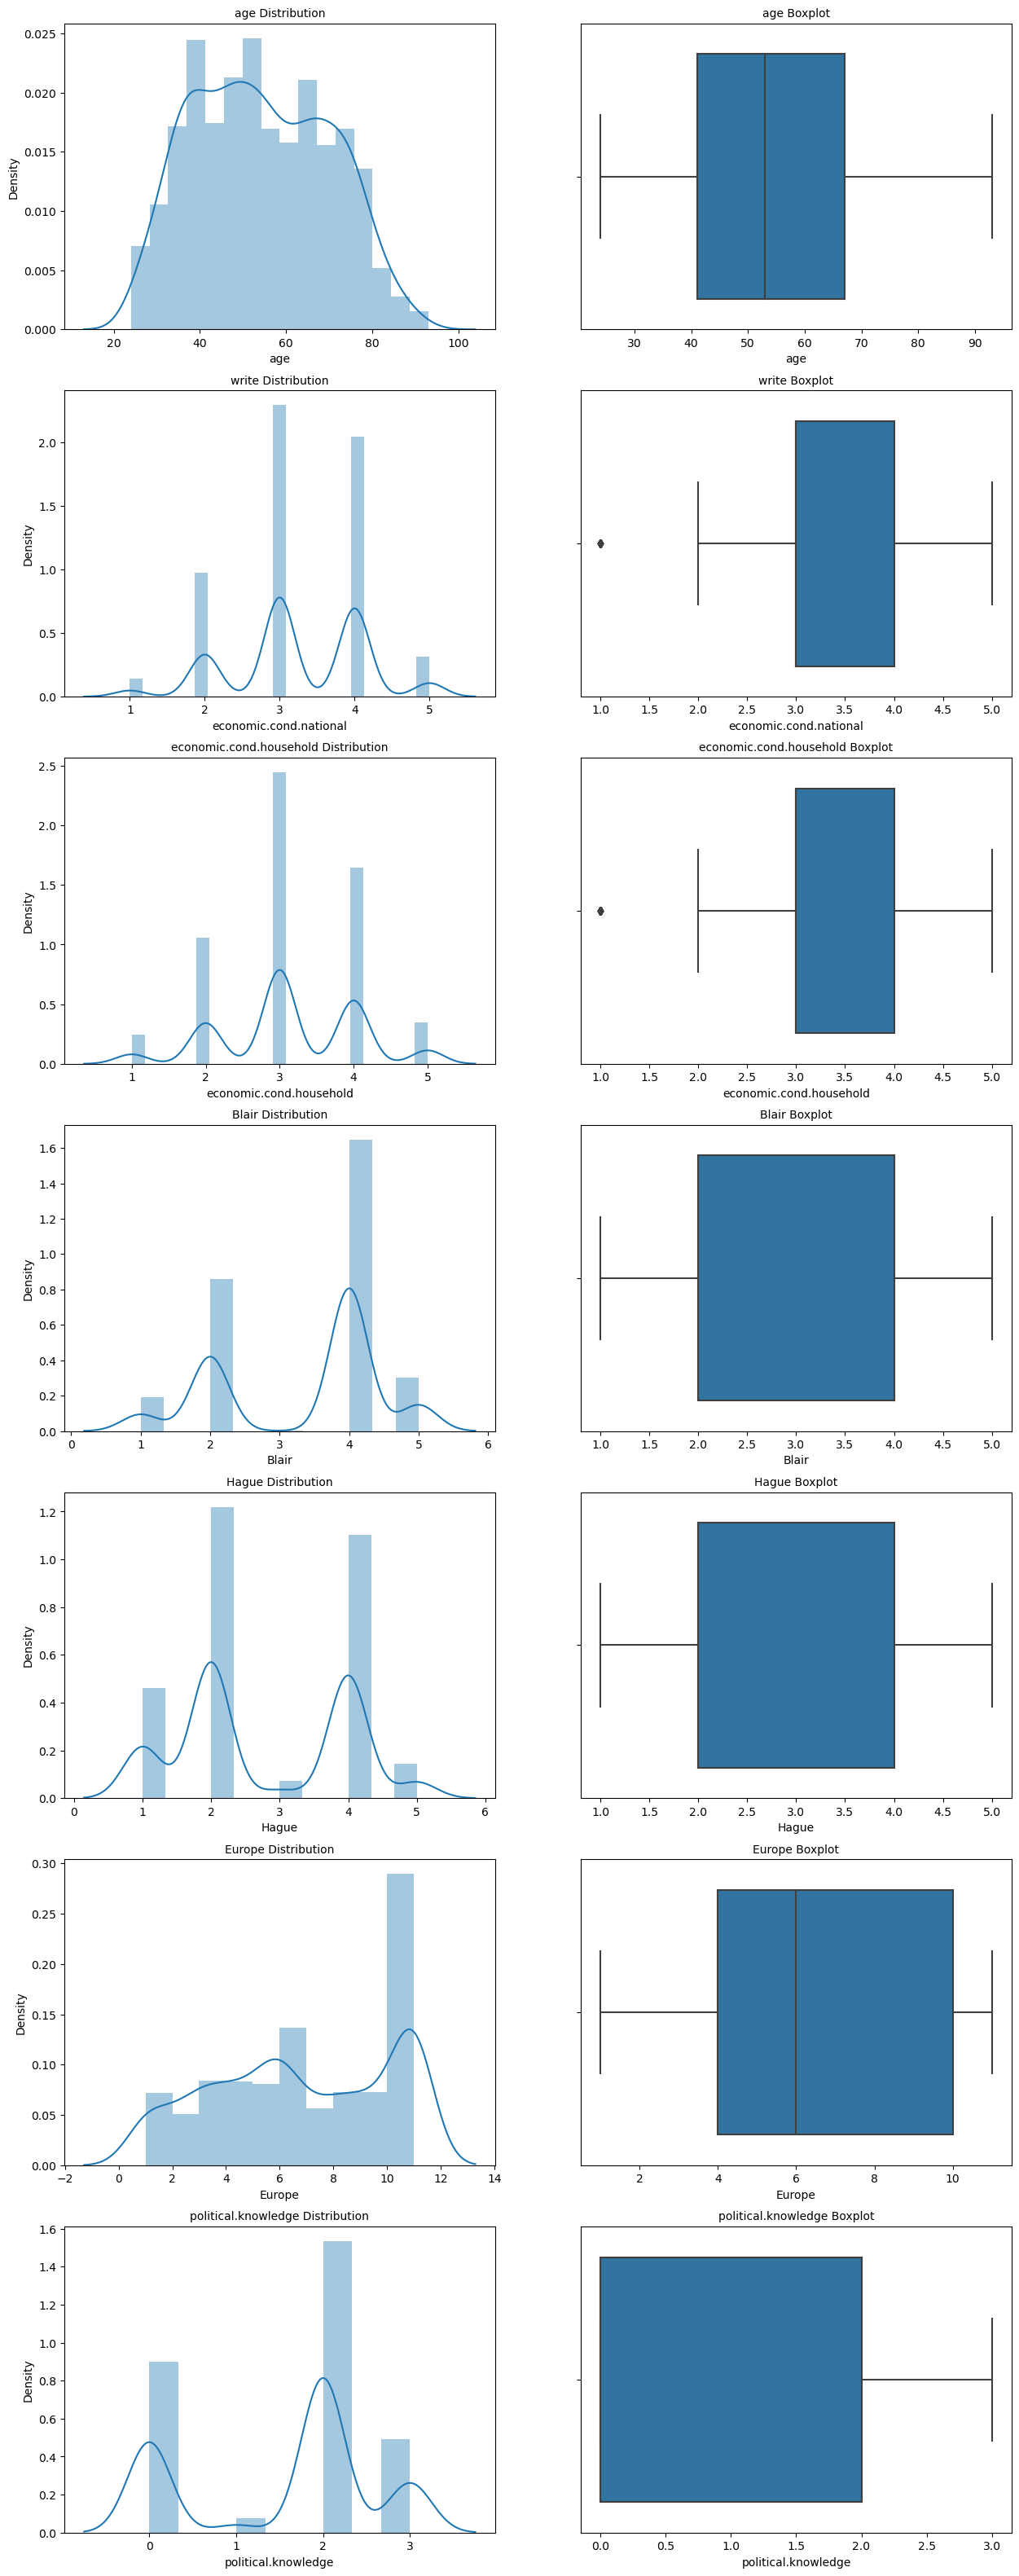

In [22]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(15,40)
a = sns.distplot(df['age'] , ax=axes[0][0])
a.set_title("age Distribution",fontsize=10)

a = sns.boxplot(df['age'] , orient = "v" , ax=axes[0][1])
a.set_title("age Boxplot",fontsize=10)

a = sns.distplot(df['economic.cond.national'] , ax=axes[1][0])
a.set_title("write Distribution",fontsize=10)

a = sns.boxplot(df['economic.cond.national'] , orient = "v" , ax=axes[1][1])
a.set_title("write Boxplot",fontsize=10)


a = sns.distplot(df['economic.cond.household'] , ax=axes[2][0])
a.set_title("economic.cond.household Distribution",fontsize=10)

a = sns.boxplot(df['economic.cond.household'] , orient = "v" , ax=axes[2][1])
a.set_title("economic.cond.household Boxplot",fontsize=10)


a = sns.distplot(df['Blair'] , ax=axes[3][0])
a.set_title("Blair Distribution",fontsize=10)

a = sns.boxplot(df['Blair'] , orient = "v" , ax=axes[3][1])
a.set_title("Blair Boxplot",fontsize=10)

a = sns.distplot(df['Hague'] , ax=axes[4][0])
a.set_title("Hague Distribution",fontsize=10)

a = sns.boxplot(df['Hague'] , orient = "v" , ax=axes[4][1])
a.set_title("Hague Boxplot",fontsize=10)

a = sns.distplot(df['Europe'] , ax=axes[5][0])
a.set_title("Europe Distribution",fontsize=10)

a = sns.boxplot(df['Europe'] , orient = "v" , ax=axes[5][1])
a.set_title("Europe Boxplot",fontsize=10)

a = sns.distplot(df['political.knowledge'] , ax=axes[6][0])
a.set_title("political.knowledge Distribution",fontsize=10)

a = sns.boxplot(df['political.knowledge'] , orient = "v" , ax=axes[6][1])
a.set_title("political.knowledge Boxplot",fontsize=10)

plt.show()


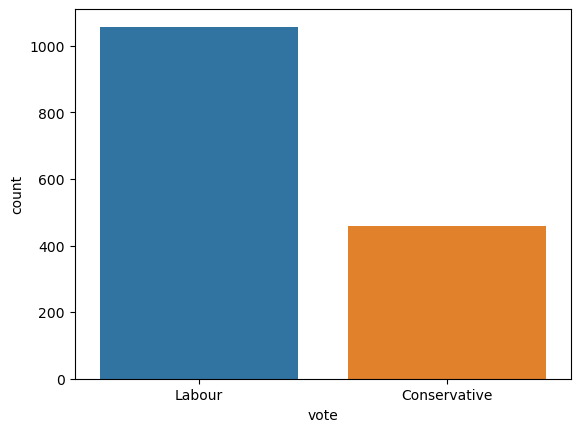

In [23]:
sns.countplot(data = df, x = 'vote')

# display the plot
plt.show()

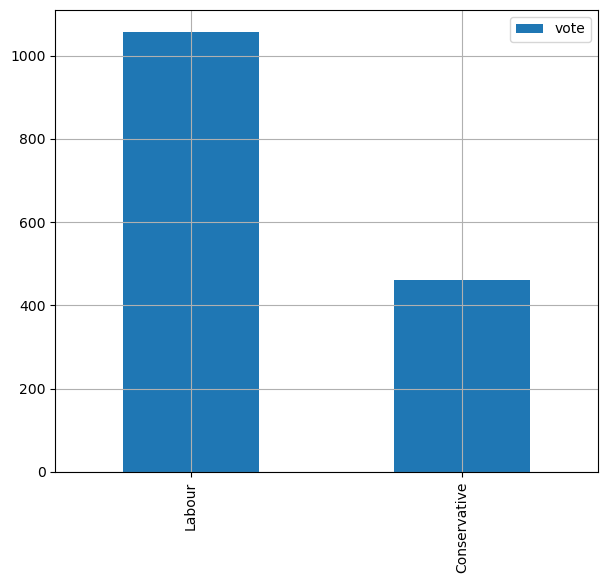

In [24]:
plt.figure(figsize=(7,6))
df['vote'].value_counts().plot(kind='bar')
plt.legend()
plt.grid()
plt.show()

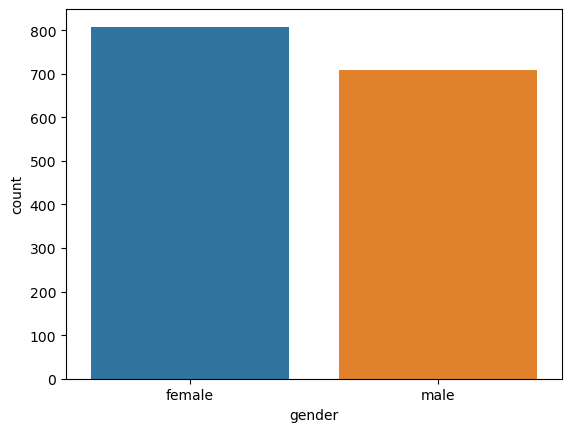

In [25]:
sns.countplot(data = df, x = 'gender')

# display the plot
plt.show()

Bivariate and Multivariate Analysis

<AxesSubplot:xlabel='Hague', ylabel='age'>

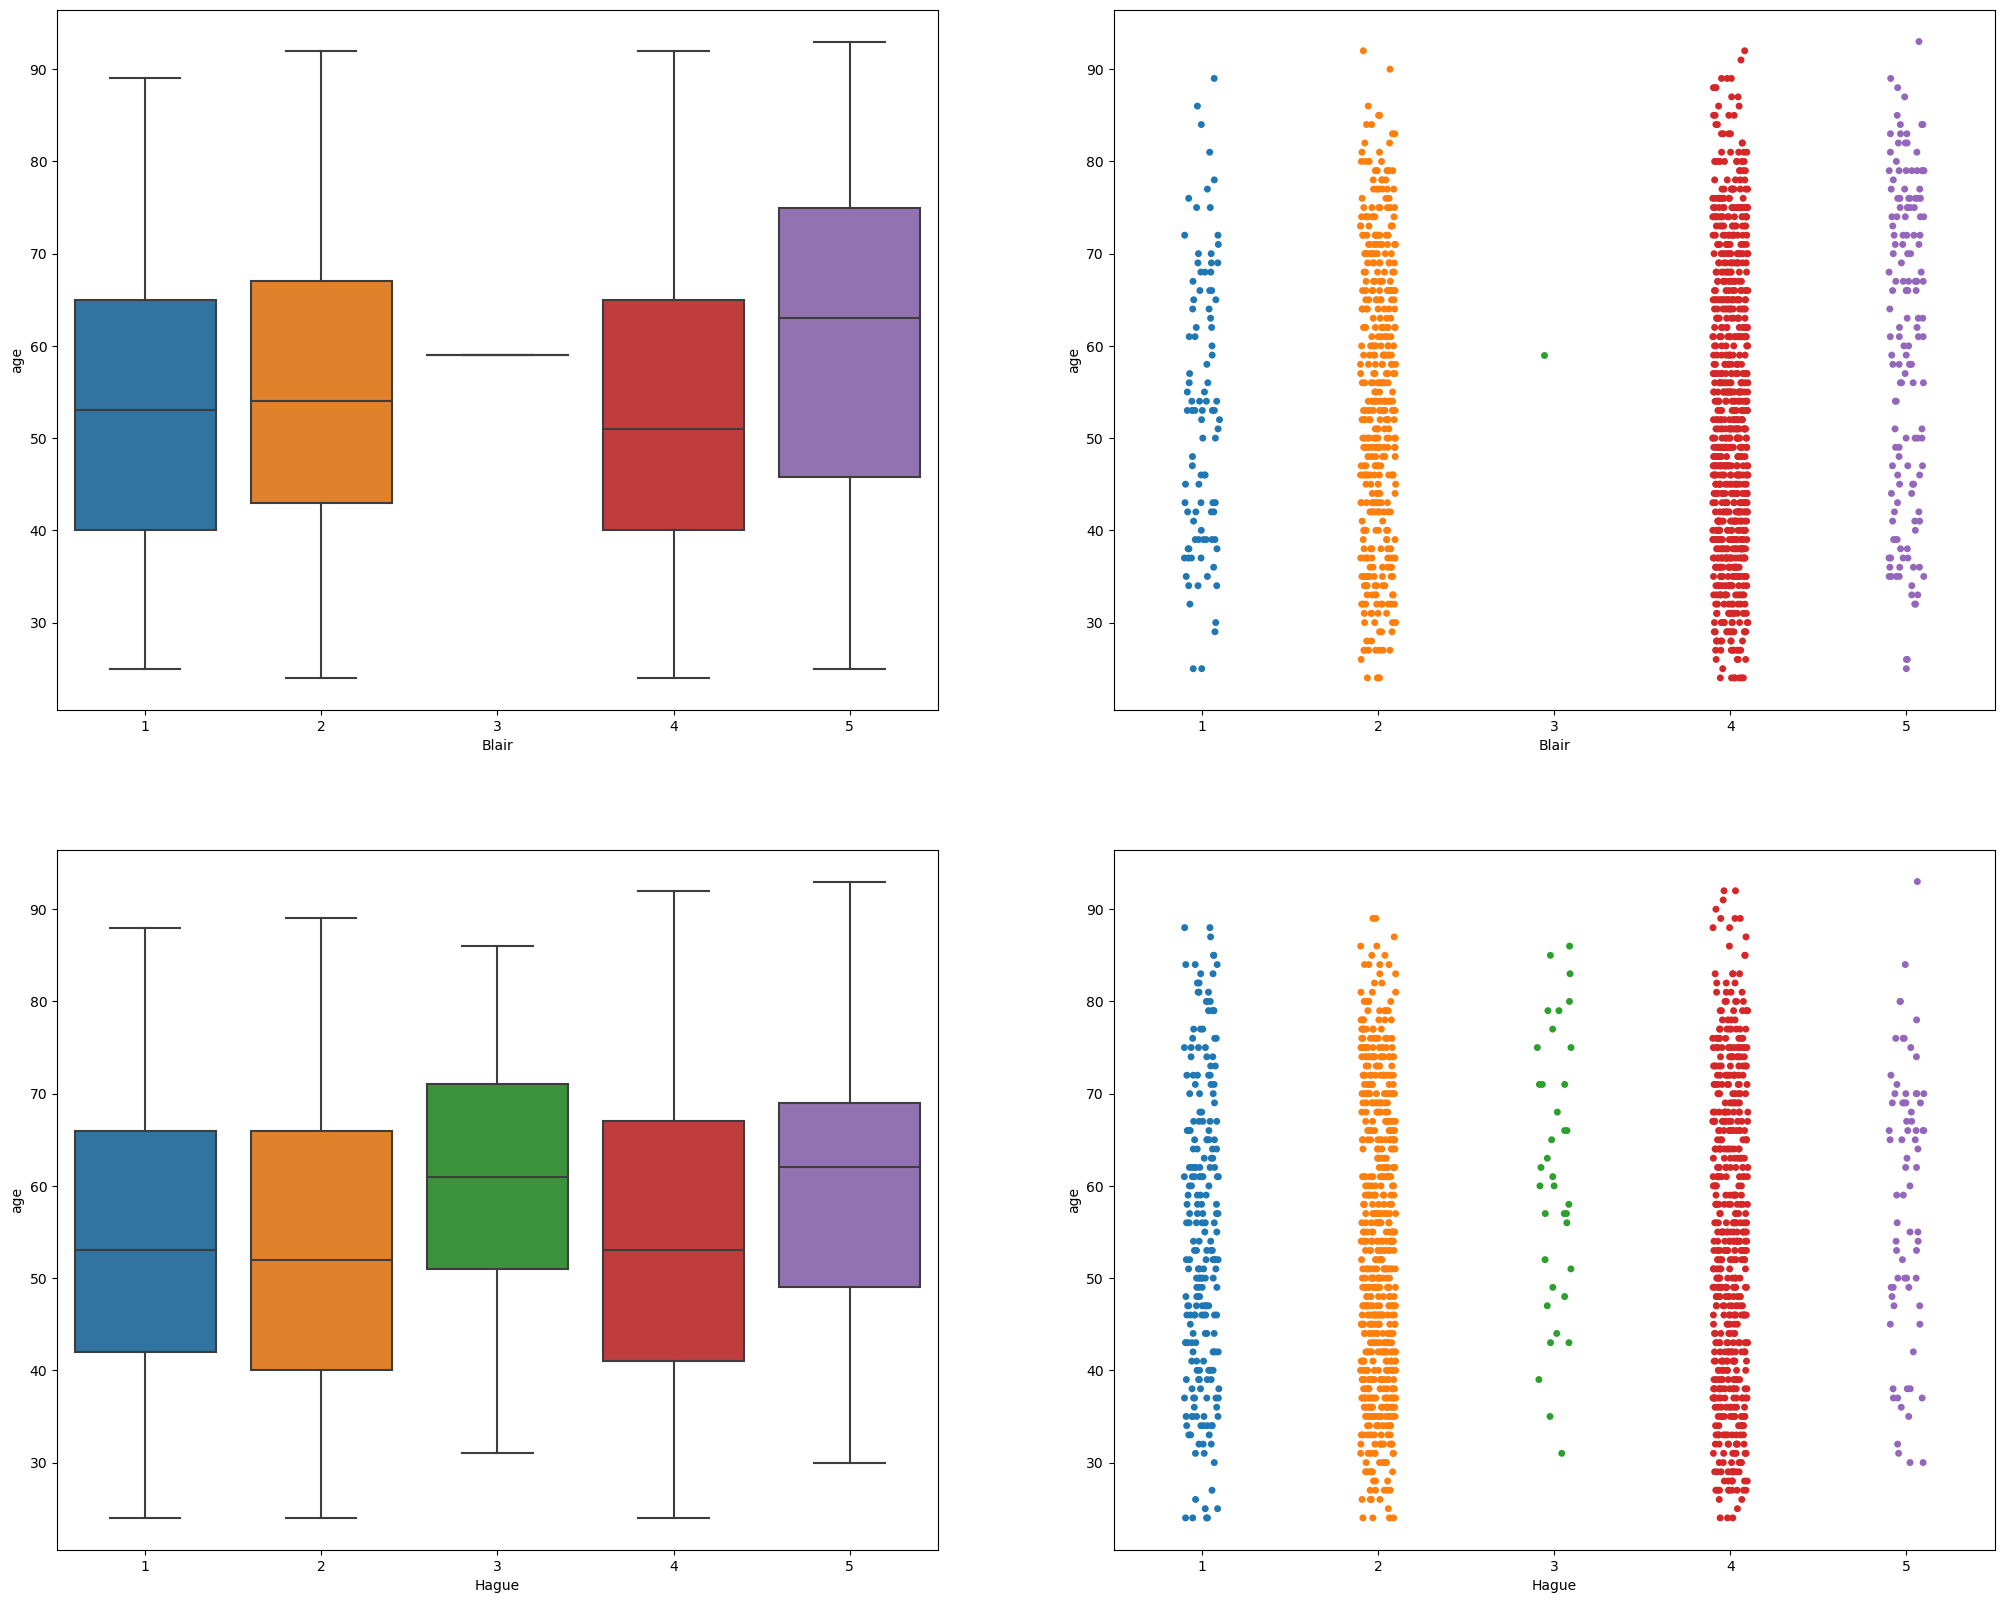

In [264]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(25,20)
sns.boxplot(df["Blair"],df["age"], ax = axes[0][0])
sns.stripplot(df["Blair"],df["age"], ax = axes[0][1])
sns.boxplot(df["Hague"],df["age"], ax = axes[1][0])
sns.stripplot(df["Hague"],df["age"], ax = axes[1][1])

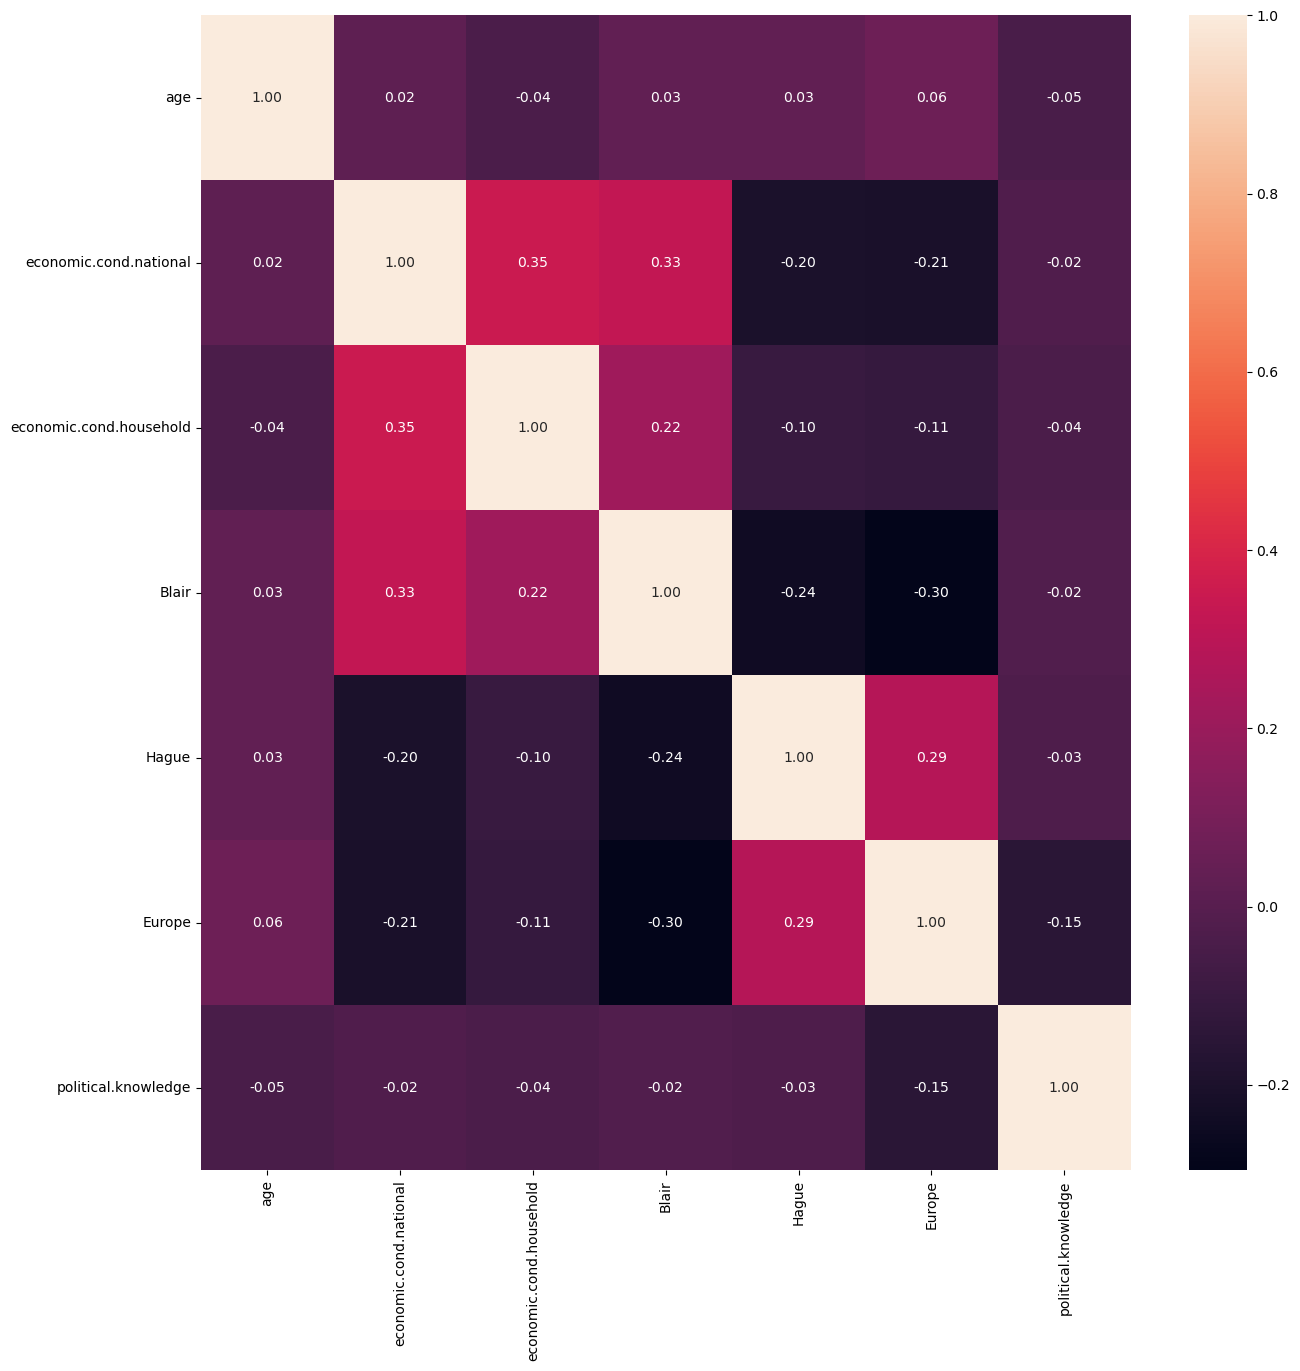

In [26]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt=".2f");

In [27]:
df.corr()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,1.000000,0.018687,-0.038868,0.032084,0.031144,0.064562,-0.046598
economic.cond.national,0.018687,1.000000,0.347687,0.326141,-0.200790,-0.209150,-0.023510
economic.cond.household,-0.038868,0.347687,1.000000,0.215822,-0.100392,-0.112897,-0.038528
Blair,0.032084,0.326141,0.215822,1.000000,-0.243508,-0.295944,-0.021299
Hague,0.031144,-0.200790,-0.100392,-0.243508,1.000000,0.285738,-0.029906
Europe,0.064562,-0.209150,-0.112897,-0.295944,0.285738,1.000000,-0.151197
political.knowledge,-0.046598,-0.023510,-0.038528,-0.021299,-0.029906,-0.151197,1.000000


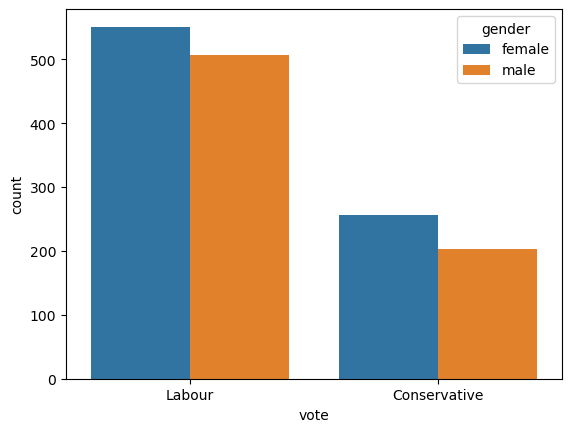

In [28]:
sns.countplot(df['vote'],hue=df['gender']);

<AxesSubplot:xlabel='age', ylabel='vote'>

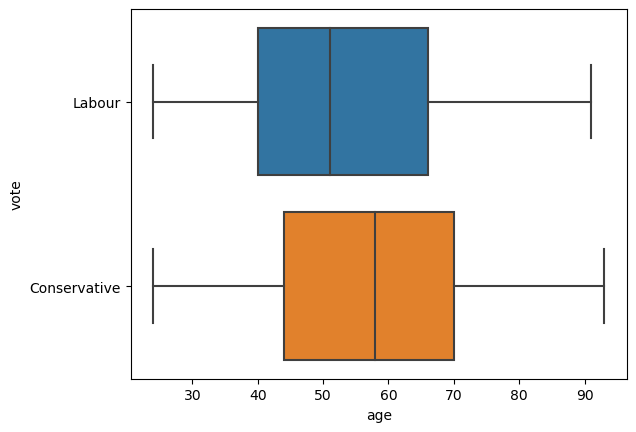

In [29]:
sns.boxplot(df["age"],df['vote'])

<AxesSubplot:xlabel='economic.cond.household', ylabel='vote'>

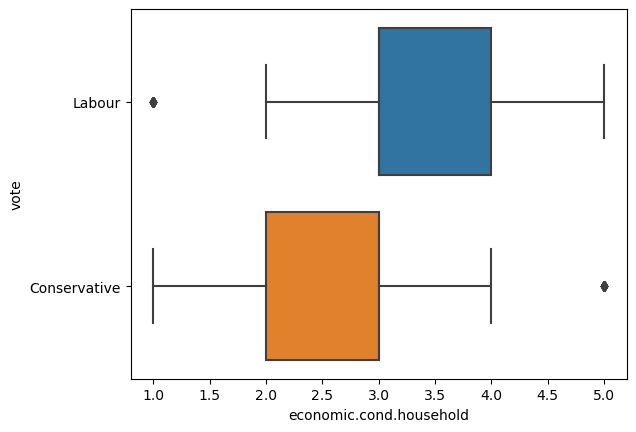

In [30]:
sns.boxplot(df["economic.cond.household"],df['vote'])

<AxesSubplot:xlabel='economic.cond.national', ylabel='vote'>

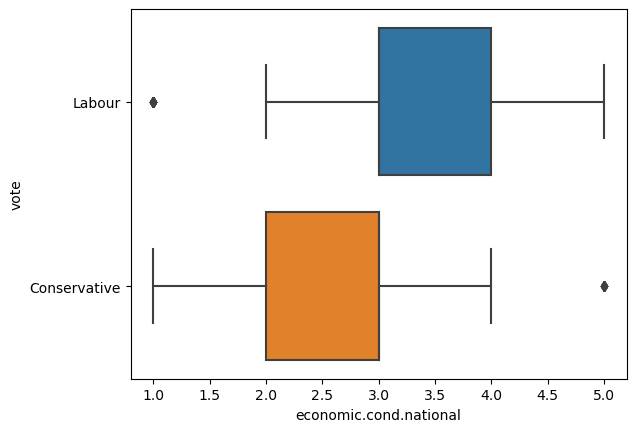

In [31]:
sns.boxplot(df["economic.cond.national"],df['vote'])

<AxesSubplot:xlabel='Europe', ylabel='vote'>

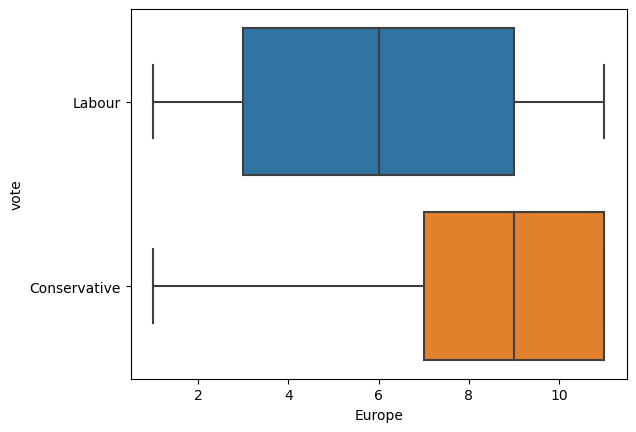

In [32]:
sns.boxplot(df["Europe"],df['vote'])

<AxesSubplot:xlabel='political.knowledge', ylabel='vote'>

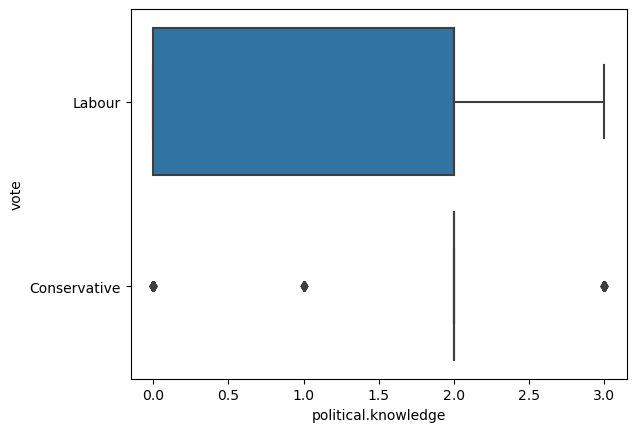

In [33]:
sns.boxplot(df["political.knowledge"],df['vote'])

<Figure size 2500x1500 with 0 Axes>

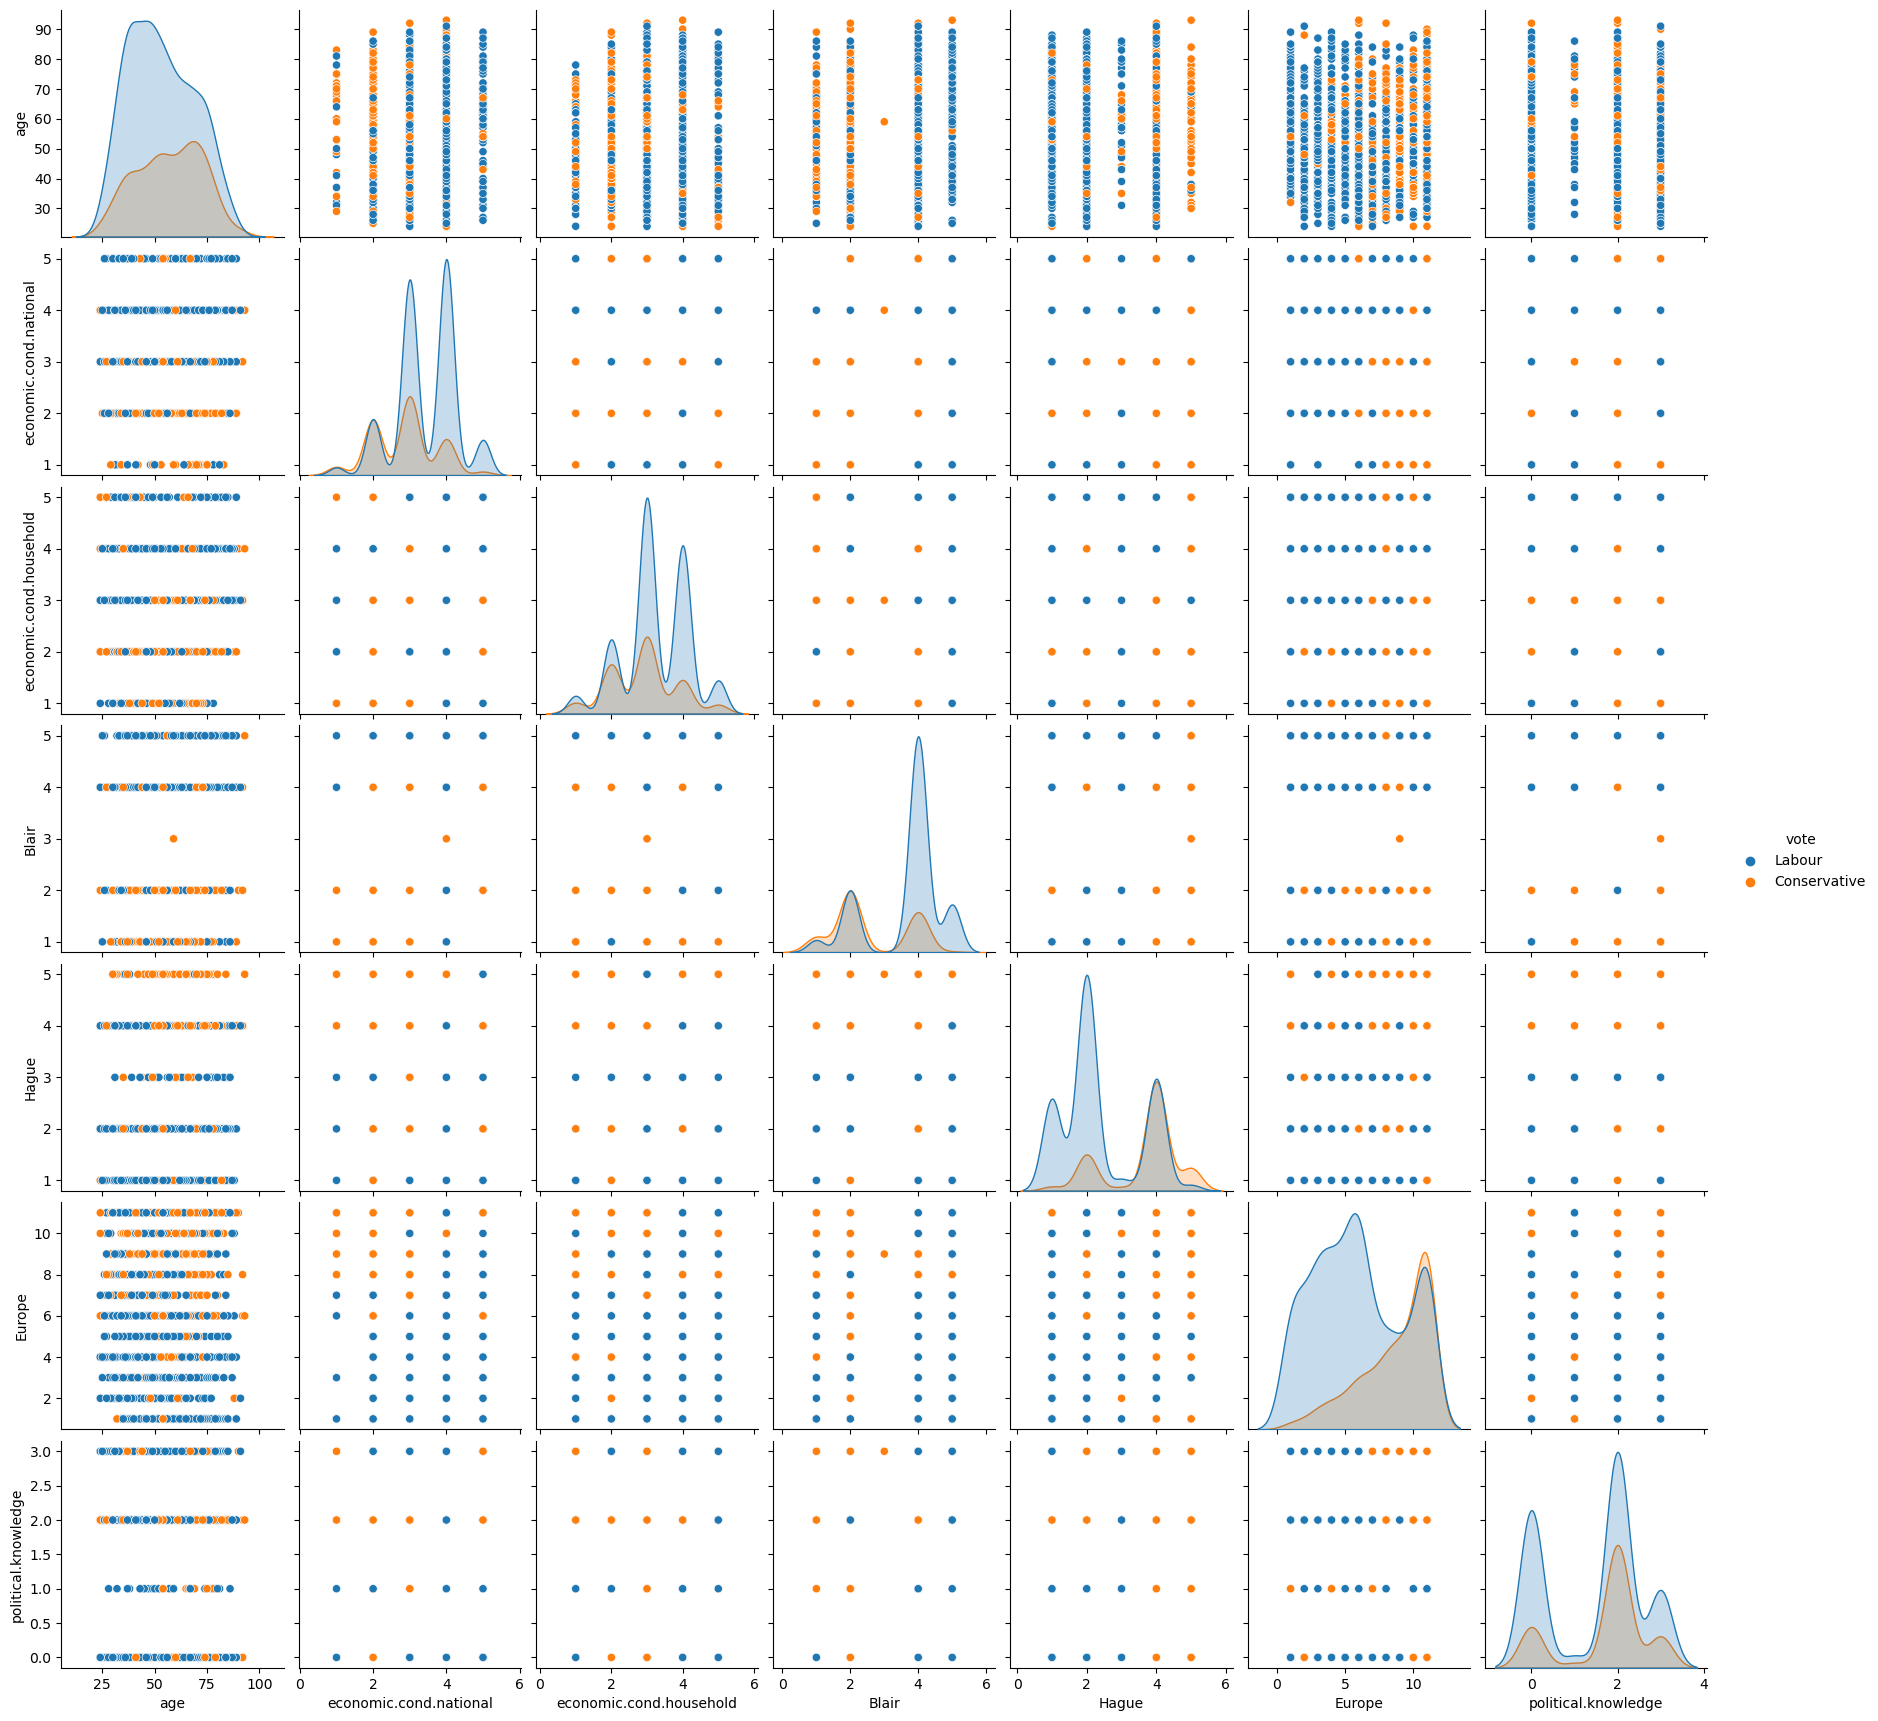

In [34]:
plt.figure(figsize=(25,15))
sns.pairplot(df ,diag_kind='kde' ,hue='vote');
plt.show()

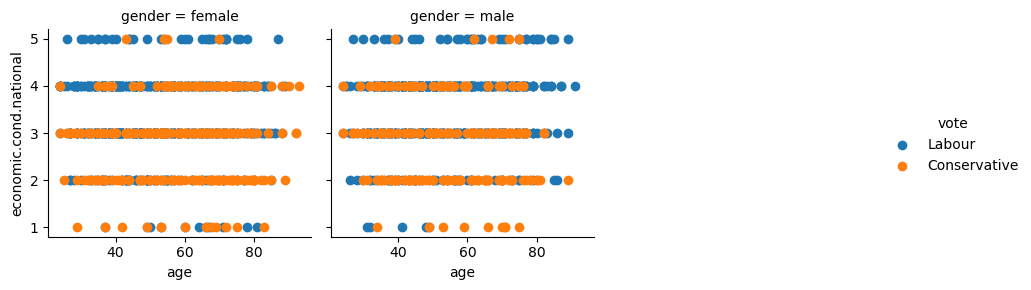

In [35]:
g = sns.FacetGrid(df, col="gender", hue='vote',col_wrap=3, height=3)
g = g.map(plt.scatter, "age", 'economic.cond.national')
g.add_legend()

Outlier Check

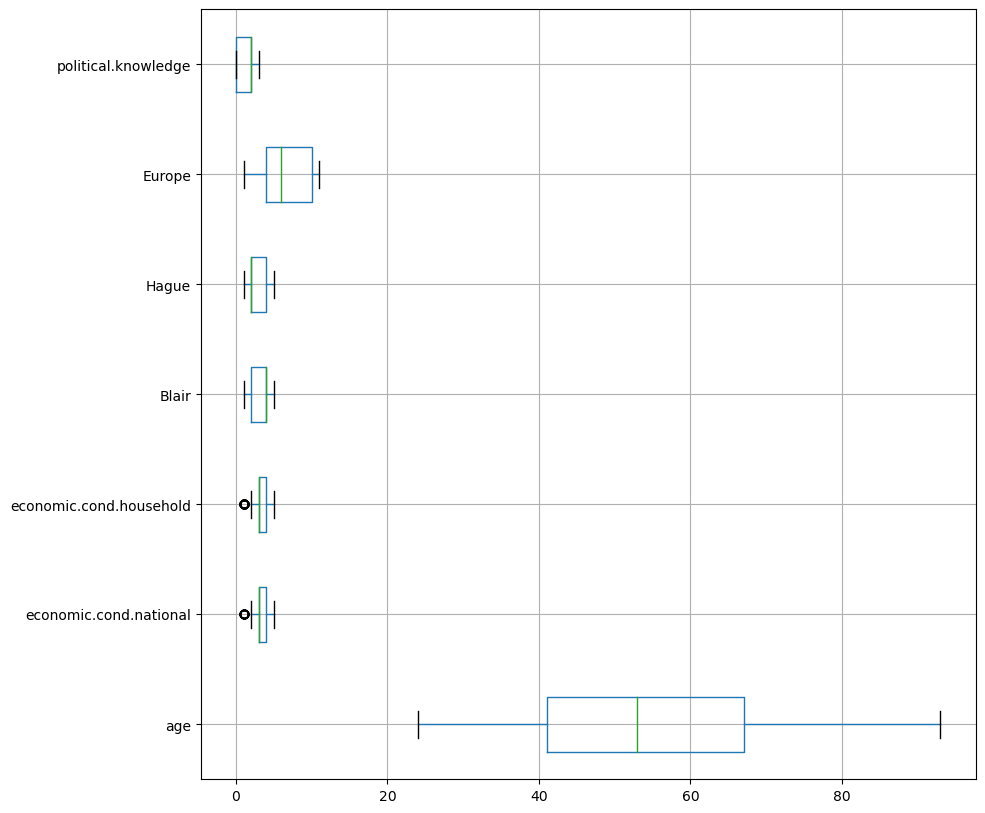

In [36]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
df[num].boxplot(vert=0)
plt.show()

There are nearly no outliers in most of the numerical columns, only outlier is in economic.cond.household and economic.cond.national variable. In Gaussian Naive Bayes, outliers will affect the shape of the Gaussian distribution and have the usual effects on the mean etc. So depending on our use case, it makes sense to remove outlier .

outlier treatment¶

In [37]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [38]:
lr,ur=remove_outlier(df["economic.cond.national"])
df["economic.cond.national"]=np.where(df["economic.cond.national"]>ur,ur,df["economic.cond.national"])
df["economic.cond.national"]=np.where(df["economic.cond.national"]<lr,lr,df["economic.cond.national"])

In [39]:
lr,ur=remove_outlier(df["economic.cond.household"])
df["economic.cond.household"]=np.where(df["economic.cond.household"]>ur,ur,df["economic.cond.household"])
df["economic.cond.household"]=np.where(df["economic.cond.household"]<lr,lr,df["economic.cond.household"])

<AxesSubplot:>

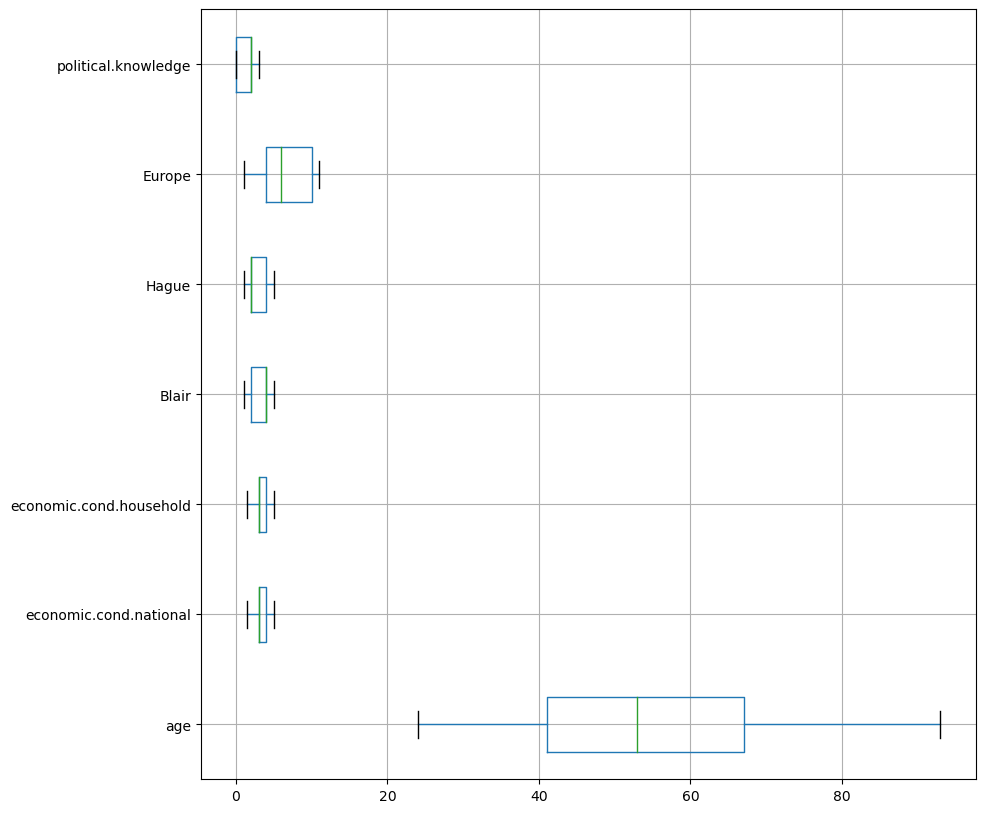

In [40]:
plt.figure(figsize=(10,10))
df[num].boxplot(vert=0)

Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 2 pts), Data Split: Split the data into train and test (70:30) (2 pts). The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed.

get_dummies of the object variables

In [41]:
cat

['vote', 'gender']

In [42]:
cat1=['gender_male']

Drop First is used to ensure that multiple columns created based on the levels of categorical variable are not included else it will result in to multicollinearity . This is done to ensure that we do not land in to dummy trap.

In [43]:
df.shape

(1517, 9)

In [44]:
df_dummy = pd.get_dummies(df,drop_first=True)
df_dummy.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43,3.0,3.0,4,1,2,2,1,0
1,36,4.0,4.0,4,4,5,2,1,1
2,35,4.0,4.0,5,2,3,2,1,1
3,24,4.0,2.0,2,1,4,0,1,0
4,41,2.0,2.0,1,1,6,2,1,1


Train-Test Split Split X and y into training and test set in 70:30 ratio with random_state=1

In [63]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [64]:
#step 1
# Copy all the predictor variables into X dataframe
X = df_dummy.drop('vote_Labour', axis=1)

# Copy target into the y dataframe. 
y = df_dummy['vote_Labour']

In [65]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis) (2 pts). Interpret the inferences of both model s (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

logistic regression

In [239]:
#step 3 intializing model
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    3.2s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

Predicting on Training and Test dataset

In [240]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

Getting the Predicted Classes and Probs

In [241]:
# probabilties that data points will be in class  1 and 0
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.281343,0.718657
1,0.043565,0.956435
2,0.246888,0.753112
3,0.049127,0.950873
4,0.150729,0.849271


In [242]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.8444863336475024

In [243]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.78      0.68      0.73       321
           1       0.87      0.92      0.89       740

    accuracy                           0.84      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.84      0.84      1061



In [244]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.73      0.66      0.69       139
           1       0.86      0.89      0.87       317

    accuracy                           0.82       456
   macro avg       0.79      0.78      0.78       456
weighted avg       0.82      0.82      0.82       456



AUC: 0.895


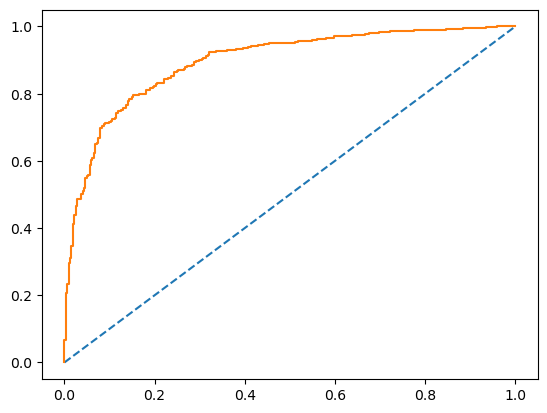

In [245]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

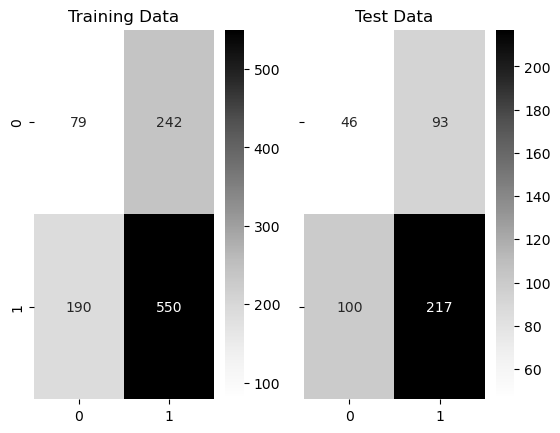

In [248]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [246]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.8223684210526315

AUC-ROC 

AUC: 0.895


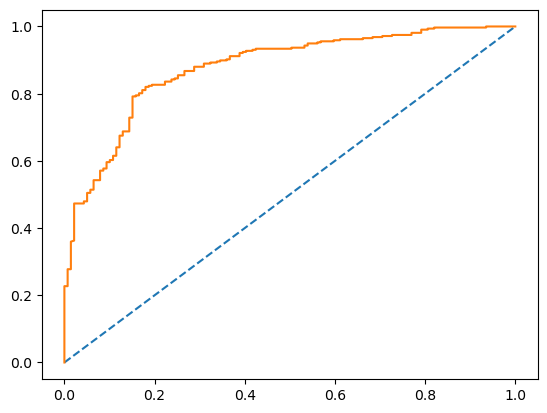

In [247]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

LDA Model

In [249]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

In [250]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

In [251]:
#intercept value
clf.intercept_ 

array([1.56421181])

In [252]:
#coefficients for the Linear Discriminant Function
clf.coef_

array([[-0.39262813,  0.34144706,  0.06364241,  0.90922479, -1.28366394,
        -0.80485211, -0.50838944, -0.12828236]])

In [253]:
X_train.columns

Index(['age', 'economic.cond.national', 'economic.cond.household', 'Blair',
       'Hague', 'Europe', 'political.knowledge', 'gender_male'],
      dtype='object')

In [254]:
a=clf.coef_
np.round(a,2) # rounded up coefficients 

array([[-0.39,  0.34,  0.06,  0.91, -1.28, -0.8 , -0.51, -0.13]])

In [255]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

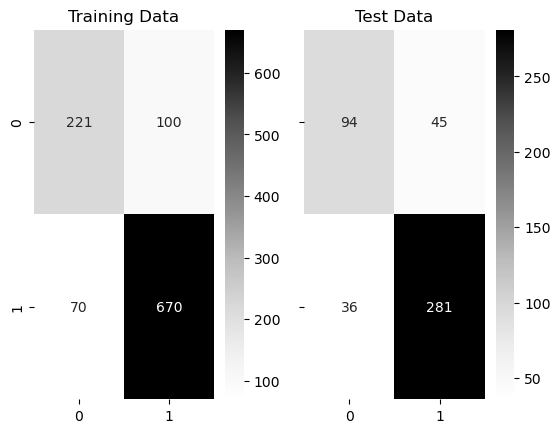

In [260]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [257]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.76      0.69      0.72       321
           1       0.87      0.91      0.89       740

    accuracy                           0.84      1061
   macro avg       0.81      0.80      0.80      1061
weighted avg       0.84      0.84      0.84      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.72      0.68      0.70       139
           1       0.86      0.89      0.87       317

    accuracy                           0.82       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456
 



AUC: 0.895


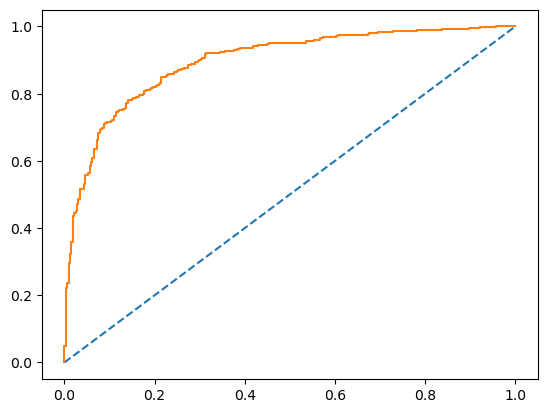

In [258]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.895


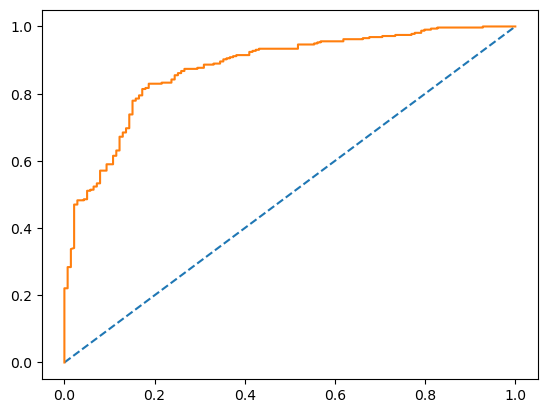

In [259]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

1.5) Apply KNN Model and Naïve Bayes Model (2pts). Interpret the inferences of each model (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

Gaussian Naive Bayes

In [86]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [87]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

Now GaussianNB classifier is built. The classifier is trained using training data. We can use fit() method for training it. After building a classifier, our model is ready to make predictions. We can use predict() method with test set features as its parameters.

Performance Matrix on train data set

In [88]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))          ## confusion_matrix
print(metrics.classification_report(y_train, y_train_predict))     ## classification_report

0.8341187558906692
[[212  95]
 [ 81 673]]
              precision    recall  f1-score   support

           0       0.72      0.69      0.71       307
           1       0.88      0.89      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



In [89]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)                    ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))         ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))    ## classification_report

0.8223684210526315
[[112  41]
 [ 40 263]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



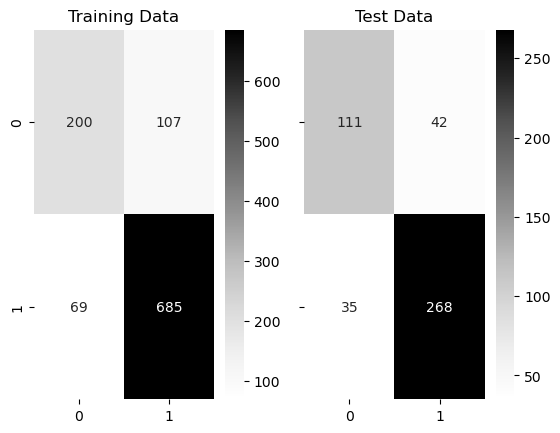

In [90]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

AUC: 0.890


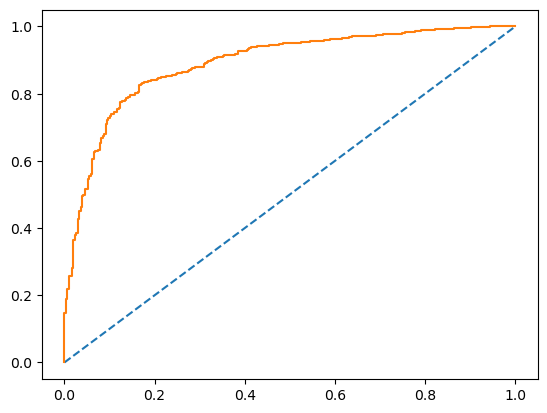

In [91]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.890


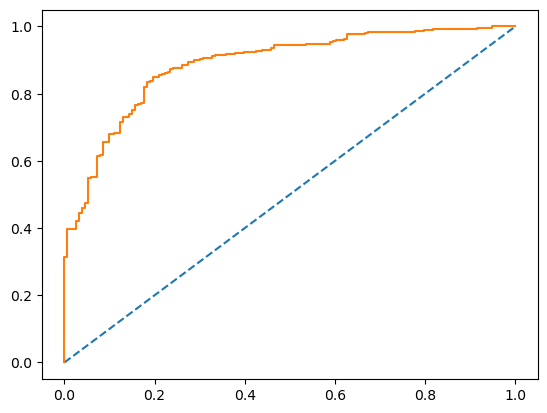

In [92]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [93]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

AUC for the Training Data: 0.890
AUC for the Test Data: 0.888


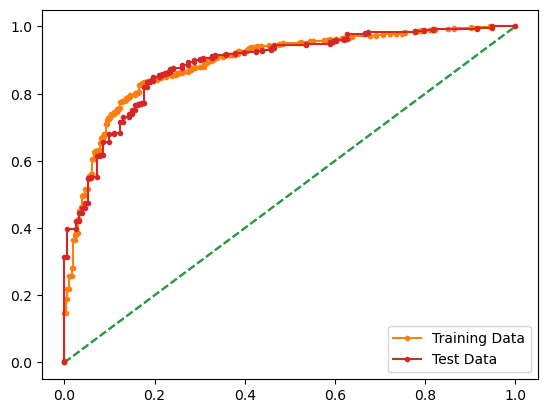

In [94]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

Accuracy of our Gaussian Naive Bayes model

In [1091]:
NB_model.score(X_train, y_train)

0.8341187558906692

In [1092]:
NB_model.score(X_test, y_test)

0.8223684210526315

**Looking at Recalls, Training accuracy and Test accuracy. Model seems to be performing well

KNN Model

For naive bayes algorithm while calculating likelihoods of numerical features it assumes the feature to be normally distributed and then we calculate probability using mean and variance of that feature only and also it assumes that all the predictors are independent to each other. Scale doesn’t matter. Performing a features scaling in this algorithms may not have much effect.

Generally, good KNN performance usually requires preprocessing of data to make all variables similarly scaled and centered

In [112]:
df_dummy.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43,3.0,3.0,4,1,2,2,1,0
1,36,4.0,4.0,4,4,5,2,1,1
2,35,4.0,4.0,5,2,3,2,1,1
3,24,4.0,2.0,2,1,4,0,1,0
4,41,2.0,2.0,1,1,6,2,1,1


In [113]:
X[["age","economic.cond.national","economic.cond.household","Blair","Hague","Europe","political.knowledge"]]=X[["age","economic.cond.national","economic.cond.household","Blair","Hague","Europe","political.knowledge"]].apply(zscore)

In [114]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,-0.716161,-0.301648,-0.179682,0.565802,-1.419969,-1.437338,0.423832,0
1,-1.162118,0.870183,0.949003,0.565802,1.014951,-0.527684,0.423832,1
2,-1.225827,0.870183,0.949003,1.417312,-0.608329,-1.134120,0.423832,1
3,-1.926617,0.870183,-1.308366,-1.137217,-1.419969,-0.830902,-1.421084,0
4,-0.843577,-1.473479,-1.308366,-1.988727,-1.419969,-0.224465,0.423832,1


In [115]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=10)

In [116]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [117]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8718190386427899
[[239  82]
 [ 54 686]]
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       321
           1       0.89      0.93      0.91       740

    accuracy                           0.87      1061
   macro avg       0.85      0.84      0.84      1061
weighted avg       0.87      0.87      0.87      1061



In [118]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8201754385964912
[[ 88  51]
 [ 31 286]]
              precision    recall  f1-score   support

           0       0.74      0.63      0.68       139
           1       0.85      0.90      0.87       317

    accuracy                           0.82       456
   macro avg       0.79      0.77      0.78       456
weighted avg       0.82      0.82      0.82       456



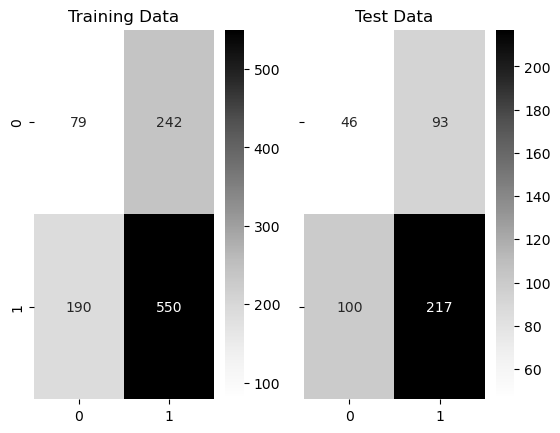

In [119]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

AUC: 0.878


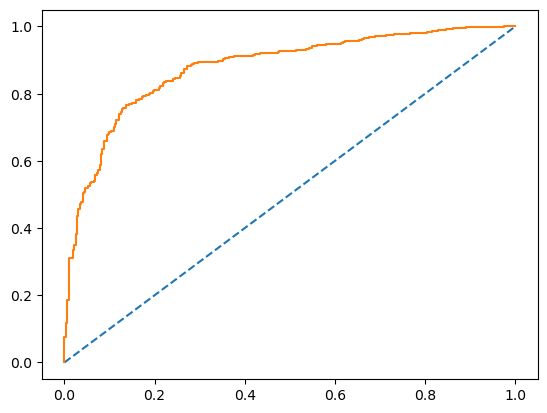

In [120]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.878


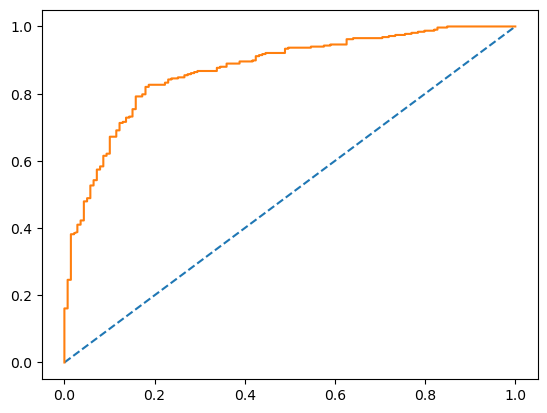

In [121]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [122]:
# loading library
from sklearn.neighbors import KNeighborsClassifier

# initiantiate learning model (k = 3)
KNN_model=KNeighborsClassifier(n_neighbors = 3,metric='euclidean')

# fitting the model
KNN_model.fit(X_train,y_train)

# predict the response
y_test_predict = KNN_model.predict(X_test)

# evaluate accuracy
print("Accuracy Score for K=3 is ", KNN_model.score(X_test, y_test))

# initiantiate learning model (k = 5)
KNN_model=KNeighborsClassifier(n_neighbors = 5,metric='euclidean')

# fitting the model
KNN_model.fit(X_train,y_train)

# predict the response
y_test_predict = KNN_model.predict(X_test)

# evaluate accuracy
print("Accuracy Score for K=5 is ", KNN_model.score(X_test, y_test))

# initiantiate learning model (k = 9)
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier(n_neighbors = 9,metric='euclidean')

# fitting the model
KNN_model.fit(X_train,y_train)

# predict the response
y_test_predict = KNN_model.predict(X_test)

# evaluate accuracy
print("Accuracy Score for K=9 is ", KNN_model.score(X_test, y_test))

Accuracy Score for K=3 is  0.8157894736842105
Accuracy Score for K=5 is  0.8201754385964912
Accuracy Score for K=9 is  0.8135964912280702


In [123]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.23026315789473684,
 0.1842105263157895,
 0.17982456140350878,
 0.1885964912280702,
 0.1864035087719298,
 0.17763157894736847,
 0.1842105263157895,
 0.1842105263157895,
 0.18201754385964908,
 0.17982456140350878]

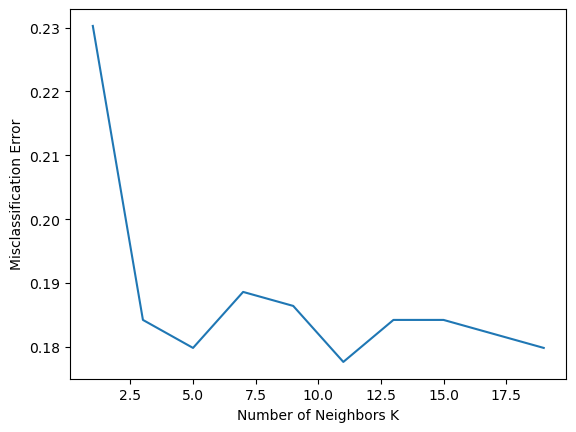

In [124]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [1106]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [1107]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8718190386427899
[[239  82]
 [ 54 686]]
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       321
           1       0.89      0.93      0.91       740

    accuracy                           0.87      1061
   macro avg       0.85      0.84      0.84      1061
weighted avg       0.87      0.87      0.87      1061



In [1108]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8201754385964912
[[ 88  51]
 [ 31 286]]
              precision    recall  f1-score   support

           0       0.74      0.63      0.68       139
           1       0.85      0.90      0.87       317

    accuracy                           0.82       456
   macro avg       0.79      0.77      0.78       456
weighted avg       0.82      0.82      0.82       456



Bagging

In [100]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [101]:
# Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[307   0]
 [  0 754]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [102]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8201754385964912
[[108  45]
 [ 37 266]]
              precision    recall  f1-score   support

           0       0.74      0.71      0.72       153
           1       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456



Gradient Boosting

In [103]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [104]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8925541941564562
[[239  68]
 [ 46 708]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



In [105]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8355263157894737
[[105  48]
 [ 27 276]]
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456



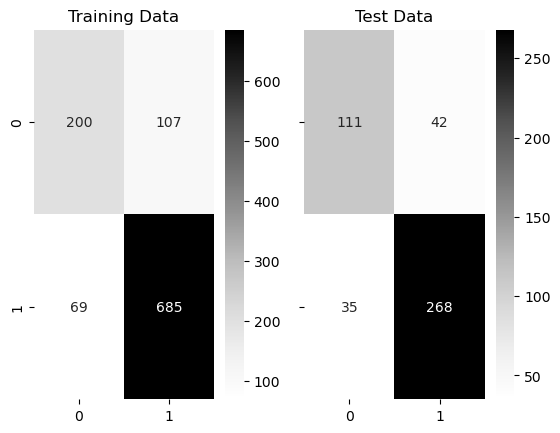

In [111]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

Bagging

In [208]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [209]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[321   0]
 [  0 740]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       321
           1       1.00      1.00      1.00       740

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



AUC: 1.000


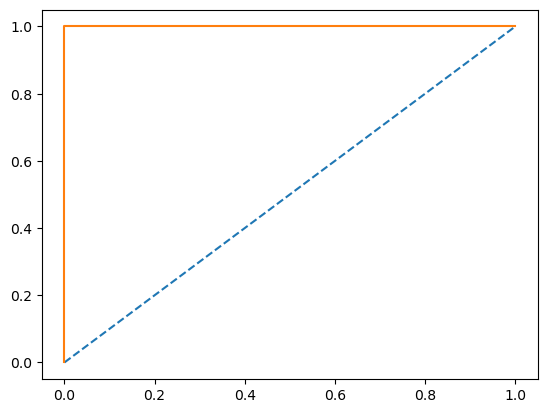

In [210]:
probs = Bagging_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

In [211]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7894736842105263
[[ 84  55]
 [ 41 276]]
              precision    recall  f1-score   support

           0       0.67      0.60      0.64       139
           1       0.83      0.87      0.85       317

    accuracy                           0.79       456
   macro avg       0.75      0.74      0.74       456
weighted avg       0.78      0.79      0.79       456



AUC: 0.844


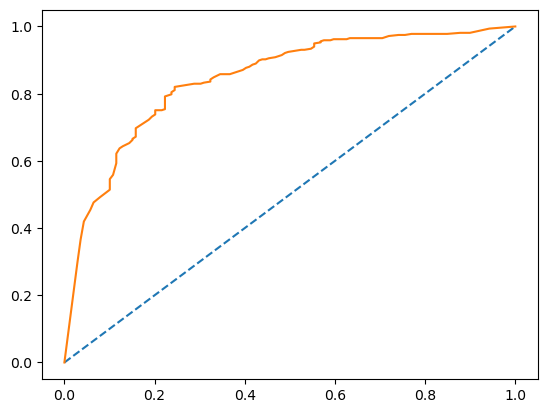

In [212]:
probs_test = Bagging_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);

Ada Boost

In [197]:
from sklearn.ensemble import AdaBoostClassifier

In [199]:
ADB_model=AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [202]:
y_train_predict=ADB_model.predict(X_train)
ADB_model_score=ADB_model.score(X_train,y_train)
print(ADB_model_score)

print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8426013195098964
[[219 102]
 [ 65 675]]
              precision    recall  f1-score   support

           0       0.77      0.68      0.72       321
           1       0.87      0.91      0.89       740

    accuracy                           0.84      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.84      0.84      1061



AUC: 0.919


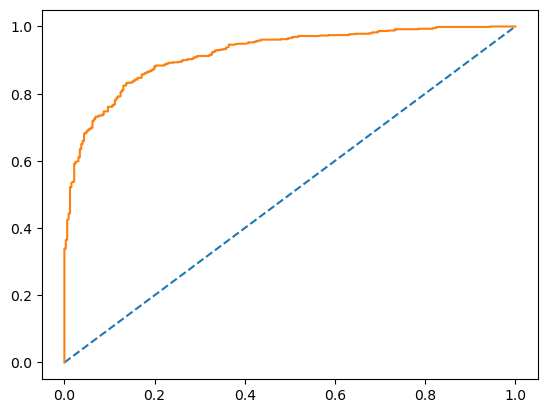

In [205]:
probs = ADB_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

In [206]:
y_test_predict = ADB_model.predict(X_test)
ADB_model_score = ADB_model.score(X_test, y_test)
print(ADB_model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8157894736842105
[[ 95  44]
 [ 40 277]]
              precision    recall  f1-score   support

           0       0.70      0.68      0.69       139
           1       0.86      0.87      0.87       317

    accuracy                           0.82       456
   macro avg       0.78      0.78      0.78       456
weighted avg       0.81      0.82      0.82       456



AUC: 0.871


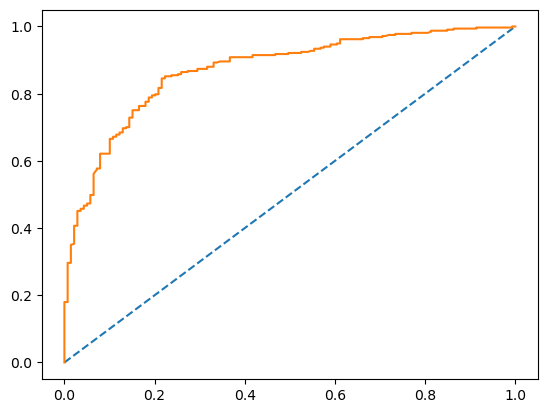

In [207]:
probs_test = ADB_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);

Gradient Boosting

In [235]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.

In [230]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8953817153628653
[[254  67]
 [ 44 696]]
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       321
           1       0.91      0.94      0.93       740

    accuracy                           0.90      1061
   macro avg       0.88      0.87      0.87      1061
weighted avg       0.89      0.90      0.89      1061



AUC: 0.957


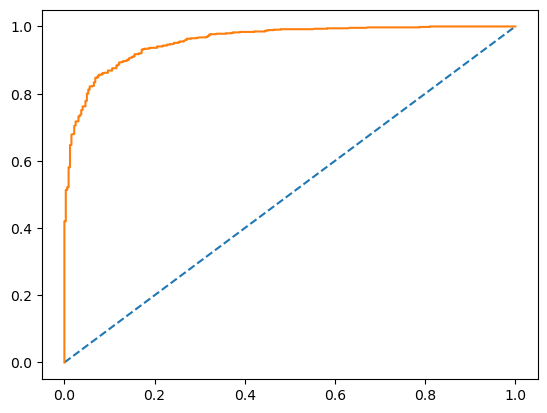

In [231]:
probs = gbcl.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

In [236]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8289473684210527
[[ 93  46]
 [ 32 285]]
              precision    recall  f1-score   support

           0       0.74      0.67      0.70       139
           1       0.86      0.90      0.88       317

    accuracy                           0.83       456
   macro avg       0.80      0.78      0.79       456
weighted avg       0.83      0.83      0.83       456



AUC: 0.884


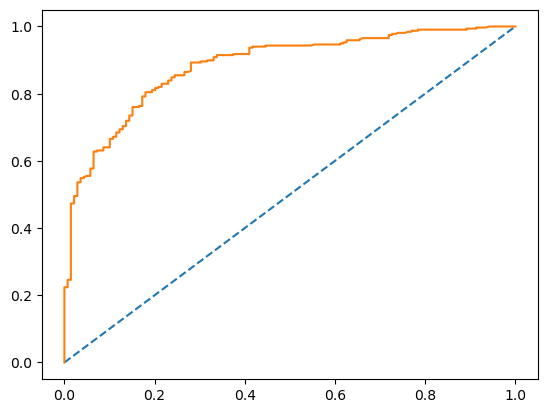

In [238]:
probs_test = gbcl.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr)


ADA Boosting

In [448]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [449]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8501413760603205
[[214  93]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



In [450]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8135964912280702
[[103  50]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



In [446]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [447]:
## Performance Matrix on train data set
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8341187558906692
[[200 107]
 [ 69 685]]
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [431]:
dtree = DecisionTreeClassifier(random_state=123)

In [432]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=123)

In [433]:
predictions = dtree.predict(X_test)

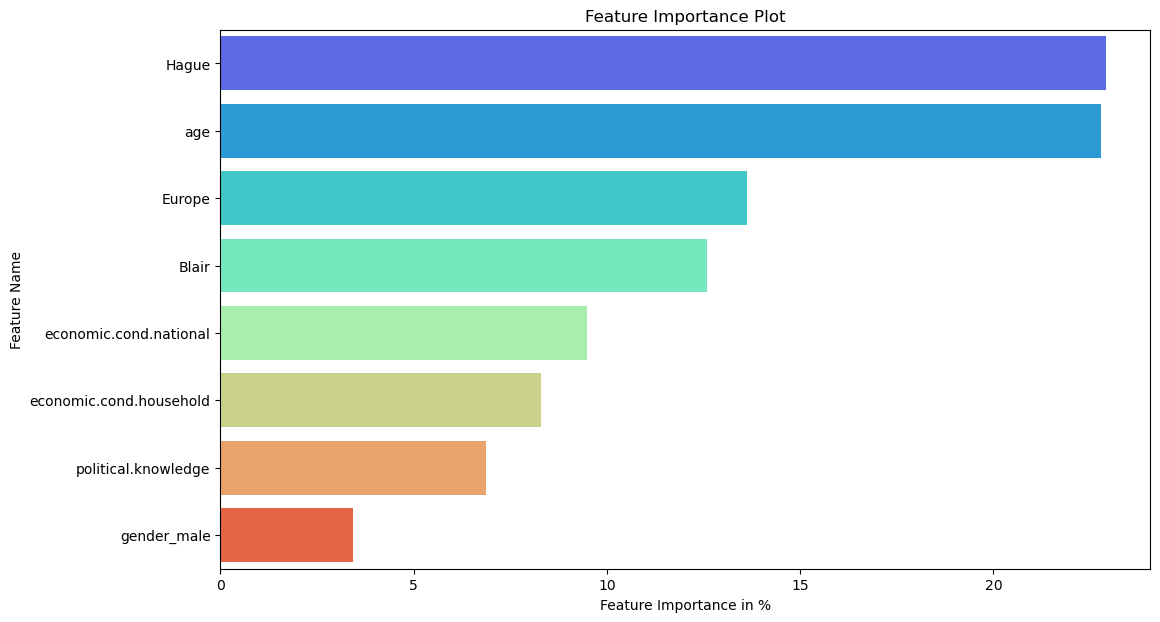

In [1156]:
x=pd.DataFrame(dtree.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

In [1157]:
from sklearn.model_selection import train_test_split
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [1158]:
from sklearn.tree import DecisionTreeClassifier

In [1159]:
# Initialise a Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion = 'gini', random_state=1)

In [1160]:
# Fit the model
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(random_state=1)

In [1161]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()

In [1162]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                              Imp
Hague                    0.223134
age                      0.222465
Europe                   0.154153
Blair                    0.126084
economic.cond.national   0.092481
economic.cond.household  0.088649
political.knowledge      0.068659
gender_male              0.024375


Grid Search for finding the optimal number of parameters:

Random Forest Model as Binary Classifier

In [158]:
from sklearn.ensemble import RandomForestClassifier

In [159]:
param_grid = {
    'min_samples_split' : [30,50,70,100],
    'min_samples_leaf':[15,25,35,50],
    'max_depth':[5,10,15,20],
    'random_state' : [0]
}

In [160]:
RF_model=RandomForestClassifier()

In [161]:
grid_search=GridSearchCV(estimator=RF_model,param_grid=param_grid,cv=10)

In [162]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [15, 25, 35, 50],
                         'min_samples_split': [30, 50, 70, 100],
                         'random_state': [0]})

In [163]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=5, min_samples_leaf=15, min_samples_split=30,
                       random_state=0)

In [164]:
RF_model.fit(X_train, y_train)

RandomForestClassifier()

In [165]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print( confusion_matrix(y_train, y_train_predict))
print( classification_report(y_train, y_train_predict))

1.0
[[321   0]
 [  0 740]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       321
           1       1.00      1.00      1.00       740

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



AUC: 1.000


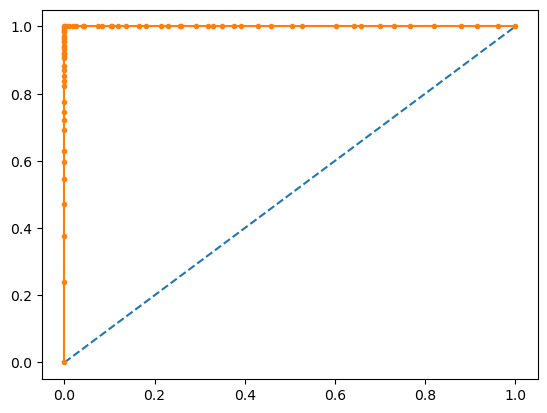

In [166]:

# predict probabilities
probs = RF_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

In [168]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print( confusion_matrix(y_test, y_test_predict))
print( classification_report(y_test, y_test_predict))

0.8092105263157895
[[ 85  54]
 [ 33 284]]
              precision    recall  f1-score   support

           0       0.72      0.61      0.66       139
           1       0.84      0.90      0.87       317

    accuracy                           0.81       456
   macro avg       0.78      0.75      0.76       456
weighted avg       0.80      0.81      0.80       456



AUC: 0.862


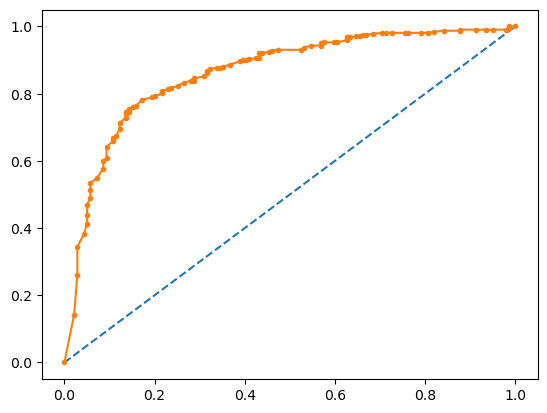

In [169]:
# predict probabilities
probs = RF_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

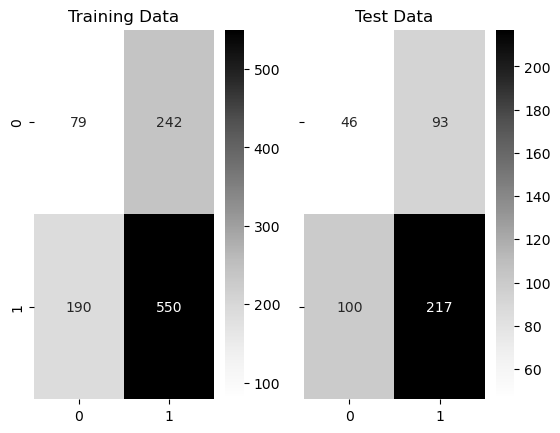

In [170]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

Decision tree classifier

Decision tree classifier

In [192]:
from sklearn.tree import DecisionTreeClassifier

In [193]:
param_grid = {
    'min_samples_split' : [30,50,70,100],
    'min_samples_leaf':[15,25,35,50],
    'max_depth':[5,10,15,20],
    'random_state' : [0]
}

In [194]:
DT_model= DecisionTreeClassifier()

In [195]:
grid_search=GridSearchCV(estimator=DT_model,param_grid=param_grid,cv=10)

In [175]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [15, 25, 35, 50],
                         'min_samples_split': [30, 50, 70, 100],
                         'random_state': [0]})

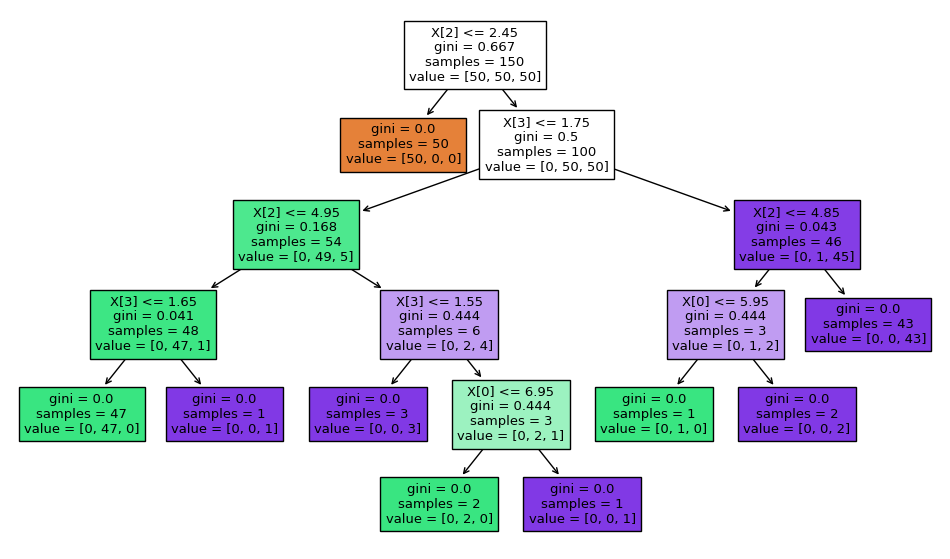

In [196]:
#Visualising Dtree in Python
from sklearn.datasets import load_iris
from sklearn import tree
clf = tree.DecisionTreeClassifier()
iris=load_iris()
plt.figure(figsize=(12,7))
tree.plot_tree(clf.fit(iris.data, iris.target),filled=True) 
plt.show()

In [176]:
DT_model=grid_search.best_estimator_

In [177]:
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=35, min_samples_split=100,
                       random_state=0)

In [178]:
## Performance Matrix on train data set
y_train_predict = DT_model.predict(X_train)
model_score = DT_model.score(X_train, y_train)
print(model_score)
print( confusion_matrix(y_train, y_train_predict))
print( classification_report(y_train, y_train_predict))

0.8303487276154571
[[195 126]
 [ 54 686]]
              precision    recall  f1-score   support

           0       0.78      0.61      0.68       321
           1       0.84      0.93      0.88       740

    accuracy                           0.83      1061
   macro avg       0.81      0.77      0.78      1061
weighted avg       0.83      0.83      0.82      1061



AUC: 0.895


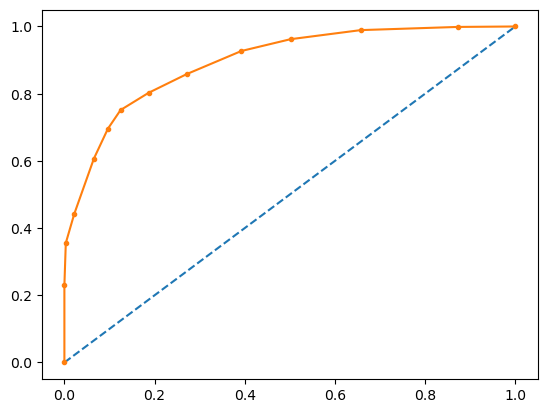

In [179]:
# AUC and ROC for the training data

# predict probabilities
probs = DT_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

In [180]:
## Performance Matrix on test data set
y_test_predict = DT_model.predict(X_test)
model_score = DT_model.score(X_test, y_test)
print(model_score)
print( confusion_matrix(y_test, y_test_predict))
print( classification_report(y_test, y_test_predict))

0.793859649122807
[[ 76  63]
 [ 31 286]]
              precision    recall  f1-score   support

           0       0.71      0.55      0.62       139
           1       0.82      0.90      0.86       317

    accuracy                           0.79       456
   macro avg       0.76      0.72      0.74       456
weighted avg       0.79      0.79      0.79       456



AUC: 0.849


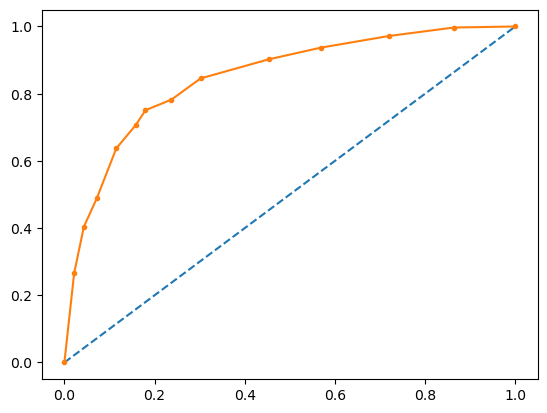

In [181]:
# predict probabilities
probs = DT_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [184]:
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from scipy.stats import zscore
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings

In [185]:
print(sas.heatmap(confusion_matrix(y_train,y_train_predict),annot=True , fmt="2g"))

NameError: name 'sas' is not defined

Decision Tree with Binary classification

In [125]:
from sklearn import tree


DT_model= tree.DecisionTreeClassifier( random_state=1)
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [126]:
## Performance Matrix on train data set
y_train_predict = DT_model.predict(X_train)
model_score = DT_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[321   0]
 [  0 740]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       321
           1       1.00      1.00      1.00       740

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [127]:
## Performance Matrix on test data set
y_test_predict = DT_model.predict(X_test)
model_score = DT_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7609649122807017
[[ 84  55]
 [ 54 263]]
              precision    recall  f1-score   support

           0       0.61      0.60      0.61       139
           1       0.83      0.83      0.83       317

    accuracy                           0.76       456
   macro avg       0.72      0.72      0.72       456
weighted avg       0.76      0.76      0.76       456



Random Forest results were better than the output from decision tree on the test data set

Let's regularize the tree to find out if this will perform better

In [189]:
reg_DT_model = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 8,min_samples_leaf=10,min_samples_split=30)
reg_DT_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=10, min_samples_split=30)

In [190]:
## Performance Matrix on train data set
y_train_predict = reg_DT_model.predict(X_train)
model_score = reg_DT_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8576814326107446
[[232  89]
 [ 62 678]]
              precision    recall  f1-score   support

           0       0.79      0.72      0.75       321
           1       0.88      0.92      0.90       740

    accuracy                           0.86      1061
   macro avg       0.84      0.82      0.83      1061
weighted avg       0.86      0.86      0.86      1061



In [191]:
## Performance Matrix on test data set
y_test_predict = reg_DT_model.predict(X_test)
model_score = reg_DT_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7543859649122807
[[ 74  65]
 [ 47 270]]
              precision    recall  f1-score   support

           0       0.61      0.53      0.57       139
           1       0.81      0.85      0.83       317

    accuracy                           0.75       456
   macro avg       0.71      0.69      0.70       456
weighted avg       0.75      0.75      0.75       456



On a Regularized Tree,  recall is good, hence for comparison we will consider the model which was built with regularization

In [186]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [187]:
## Performance Matrix on train data set
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8397737983034873
[[221 100]
 [ 70 670]]
              precision    recall  f1-score   support

           0       0.76      0.69      0.72       321
           1       0.87      0.91      0.89       740

    accuracy                           0.84      1061
   macro avg       0.81      0.80      0.80      1061
weighted avg       0.84      0.84      0.84      1061



In [188]:
## Performance Matrix on test data set
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8223684210526315
[[ 94  45]
 [ 36 281]]
              precision    recall  f1-score   support

           0       0.72      0.68      0.70       139
           1       0.86      0.89      0.87       317

    accuracy                           0.82       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456

